In [168]:
#Final Data Analysis
#Set up the notebook
%matplotlib inline
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pltmp
import seaborn as sns
import datetime
from scipy import stats
from sklearn.linear_model import Ridge
import functools
def conjunction(*conditions):
    return functools.reduce(np.logical_and, conditions)

os.chdir('/Users/macbook/Desktop/Data-Program-Files/Group-Projects/Team-Folder/Cleaned_RandomSamples/')

#Analysis Tested:
# Time of Day vs Number of Rides
# Time of Day vs Trip Duration

# Zip Code vs Trip Duration
# Zip Code vs Number of Rides

# Temperature (F) vs Number of Rides
# Temperature (F) vs Trip Duration

# Humidity vs Number of Rides
# Humidity vs Trip Duration

# Wind Speed vs Number of Rides
# Wind Speed vs Trip Duration

# SR_Flag vs Trip Duration

# Day of Week vs Number of Rides
# Day of Week vs Trip Duration

# Type of Weather vs Number of Rides
# Type of Weather vs Trip Duration

# Regression Analysis: Time of Day and Month vs Number of Rides **
# Regression Analysis: Time of Day and Month vs Trip Duration **

# Regression Analysis: Time of Day and Day of Week vs Number of Rides **
# Regression Analysis: Time of Day and Day of Week vs Trip Duration **


In [4]:
#Import the dataset
Jan = pd.read_csv("RideShare_Data_201801.csv", parse_dates=[0], low_memory=False)
Feb = pd.read_csv("RideShare_Data_201802.csv", parse_dates=[0], low_memory=False)
Mar = pd.read_csv("RideShare_Data_201803.csv", parse_dates=[0], low_memory=False)
Apr = pd.read_csv("RideShare_Data_201804.csv", parse_dates=[0], low_memory=False)
May = pd.read_csv("RideShare_Data_201805.csv", parse_dates=[0], low_memory=False)
Jun = pd.read_csv("RideShare_Data_201806.csv", parse_dates=[0], low_memory=False)
Jul = pd.read_csv("RideShare_Data_201807.csv", parse_dates=[0], low_memory=False)
Aug = pd.read_csv("RideShare_Data_201808.csv", parse_dates=[0], low_memory=False)
Sep = pd.read_csv("RideShare_Data_201809.csv", parse_dates=[0], low_memory=False)
Oct = pd.read_csv("RideShare_Data_201810.csv", parse_dates=[0], low_memory=False)
Nov = pd.read_csv("RideShare_Data_201811.csv", parse_dates=[0], low_memory=False)
Dec = pd.read_csv("RideShare_Data_201812.csv", parse_dates=[0], low_memory=False)

Yearly_Data = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec])

Yearly_Data['Pickup_DateTime'] = Yearly_Data['Pickup_DateTime'].astype('datetime64[ns]') 
Yearly_Data['Month'] = Yearly_Data['Pickup_DateTime'].dt.month
Yearly_Data['Day_Of_Week'] = Yearly_Data['Pickup_DateTime'].dt.dayofweek #0 is Monday, 6 is Sunday
Yearly_Data['Time'] = [d.time() for d in Yearly_Data['Pickup_DateTime']]
Yearly_Data[['Hour','Minute','Second']] = Yearly_Data['Time'].astype(str).str.split(':', expand=True).astype(int)

#1 = Night, 2 = Morning, 3 = Afternoon, 4 = Evening
Yearly_Data=Yearly_Data.assign(day_bucket=pd.cut(Yearly_Data.Pickup_DateTime.dt.hour,
                            [-1,6,12,18,23],
                            labels=[1,2,3,4],
                            include_lowest=True))

Yearly_Data['day_bucket'] = Yearly_Data['day_bucket'].astype(int) 

#Hours Group
Yearly_Data=Yearly_Data.assign(hours_group=pd.cut(Yearly_Data.Pickup_DateTime.dt.hour,
                            [-1,6,12,18,23],
                            labels=['Night','Morning','Afternoon','Evening'],
                            include_lowest=True))

Yearly_Data['day_bucket'] = Yearly_Data['day_bucket'].astype(int) 

Yearly_Data.head()


,#,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,...,weather_main,weather_description,Month,Day_Of_Week,Time,Hour,Minute,Second,day_bucket,hours_group
0,0,2018-01-01 00:00:02,2018-01-01 00:34:21,148.0,48.0,0.0,"Lower East Side, Manhattan","Clinton East, Manhattan",10024,10024,...,Clear,sky is clear,1,0,00:00:02,0,0,2,1,Night
1,1,2018-01-01 00:04:52,2018-01-01 00:19:04,65.0,61.0,1.0,"Downtown Brooklyn/MetroTech, Brooklyn","Crown Heights North, Brooklyn",11201,11216,...,Clear,sky is clear,1,0,00:04:52,0,4,52,1,Night
2,2,2018-01-01 00:05:05,2018-01-01 00:18:08,114.0,148.0,0.0,"Greenwich Village South, Manhattan","Lower East Side, Manhattan",10024,10024,...,Clear,sky is clear,1,0,00:05:05,0,5,5,1,Night
3,3,2018-01-01 00:05:41,2018-01-01 00:26:39,79.0,189.0,0.0,"East Village, Manhattan","Prospect Heights, Brooklyn",10024,11216,...,Clear,sky is clear,1,0,00:05:41,0,5,41,1,Night
4,4,2018-01-01 00:06:22,2018-01-01 00:26:00,7.0,130.0,0.0,"Astoria, Queens","Jamaica, Queens",11366,11366,...,Clear,sky is clear,1,0,00:06:22,0,6,22,1,Night


In [169]:
# Time of Day vs Trip Duration
Hourly_TD = Yearly_Data.groupby(['day_bucket'])
Hourly_TD = Hourly_TD['Trip_Duration'].mean()
Hourly_TD = Hourly_TD.reset_index()
Hourly_TD.head()


,day_bucket,Trip_Duration
0,1,17.870771
1,2,20.543959
2,3,22.267852
3,4,18.442345


In [170]:
# Time of Day vs Number of Rides
Hourly_C = Yearly_Data.groupby(['day_bucket'])
Hourly_C = Hourly_C['#'].count()
Hourly_C = Hourly_C.reset_index()
Hourly_C.head()


,day_bucket,#
0,1,158277
1,2,267796
2,3,323877
3,4,295163


In [171]:
# Zip vs Trip Duration
Zip_TD = Yearly_Data.groupby(['Pickup_ZipCode'])
Zip_TD = Zip_TD['Trip_Duration'].mean()
Zip_TD = Zip_TD.reset_index()
Zip_TD.head()


,Pickup_ZipCode,Trip_Duration
0,7114,57.295775
1,10001,21.023272
2,10003,20.354222
3,10004,25.569853
4,10007,20.562173


In [172]:
# Zip vs Number of Rides
Zip_C = Yearly_Data.groupby(['Pickup_ZipCode'])
Zip_C = Zip_C['#'].count()
Zip_C = Zip_C.reset_index()
Zip_C.head()


,Pickup_ZipCode,#
0,7114,142
1,10001,18692
2,10003,14649
3,10004,272
4,10007,12980


In [173]:
# Temp (F) vs Trip Duration
Temp_TD = Yearly_Data.groupby(['Temp'])
Temp_TD = Temp_TD['Trip_Duration'].mean()
Temp_TD = Temp_TD.reset_index()
Temp_TD.head()


,Temp,Trip_Duration
0,2,16.521583
1,3,15.960938
2,4,14.920705
3,5,15.451613
4,6,17.981982


In [174]:
# Temp (F) vs Number of Rides
Temp_C = Yearly_Data.groupby(['Temp'])
Temp_C = Temp_C['#'].count()
Temp_C = Temp_C.reset_index()
Temp_C.head()


,Temp,#
0,2,278
1,3,128
2,4,227
3,5,124
4,6,555


In [175]:
# Humidity vs Trip Duration
Humid_TD = Yearly_Data.groupby(['humidity'])
Humid_TD = Humid_TD['Trip_Duration'].mean()
Humid_TD = Humid_TD.reset_index()
Humid_TD.head()


,humidity,Trip_Duration
0,12.0,18.157005
1,13.0,21.379310
2,14.0,19.012887
3,15.0,20.425490
4,16.0,21.366803


In [176]:
# Humidity vs Trip Count
Humid_C = Yearly_Data.groupby(['humidity'])
Humid_C = Humid_C['#'].count()
Humid_C = Humid_C.reset_index()
Humid_C.head()


,humidity,#
0,12.0,414
1,13.0,145
2,14.0,776
3,15.0,510
4,16.0,488


In [178]:
# Wind Speed vs Trip Duration
Wind_TD = Yearly_Data.groupby(['wind_speed'])
Wind_TD = Wind_TD['Trip_Duration'].mean()
Wind_TD = Wind_TD.reset_index()
Wind_TD.head()


,wind_speed,Trip_Duration
0,0.0,20.789872
1,1.0,20.211650
2,2.0,20.289537
3,3.0,20.026515
4,4.0,19.868053


In [179]:
# Wind Speed vs Trip Count
Wind_C = Yearly_Data.groupby(['wind_speed'])
Wind_C = Wind_C['#'].count()
Wind_C = Wind_C.reset_index()
Wind_C.head()


,wind_speed,#
0,0.0,13092
1,1.0,231382
2,2.0,269095
3,3.0,204221
4,4.0,143012


In [180]:
# SR_Flag vs Trip Duration
SR_TD = Yearly_Data.groupby(['SR_Flag'])
SR_TD = SR_TD['Trip_Duration'].mean()
SR_TD = SR_TD.reset_index()
SR_TD.head()


,SR_Flag,Trip_Duration
0,0.0,19.323865
1,1.0,21.942934


In [181]:
# SR_Flag vs Trip Count
SR_C = Yearly_Data.groupby(['SR_Flag'])
SR_C = SR_C['#'].count()
SR_C = SR_C.reset_index()
SR_C.head()


,SR_Flag,#
0,0.0,743463
1,1.0,301650


In [182]:
# Day of Week vs Trip Duration
DOW_TD = Yearly_Data.groupby(['Day_Of_Week'])
DOW_TD = DOW_TD['Trip_Duration'].mean()
DOW_TD = DOW_TD.reset_index()
DOW_TD.head()


,Day_Of_Week,Trip_Duration
0,0,19.605943
1,1,20.405964
2,2,20.598021
3,3,21.507073
4,4,21.044993


In [183]:
# Day of Week vs Trip Count
DOW_C = Yearly_Data.groupby(['Day_Of_Week'])
DOW_C = DOW_C['#'].count()
DOW_C = DOW_C.reset_index()
DOW_C.head()


,Day_Of_Week,#
0,0,134006
1,1,133874
2,2,139480
3,3,146052
4,4,161758


In [184]:
# Type of Weather vs Trip Count
Weather_TD = Yearly_Data.groupby(['weather_main'])
Weather_TD = Weather_TD['Trip_Duration'].mean()
Weather_TD = Weather_TD.reset_index()
Weather_TD.head()


,weather_main,Trip_Duration
0,Clear,20.053680
1,Clouds,20.040346
2,Drizzle,19.632424
3,Fog,21.004785
4,Haze,21.168257


In [185]:
# Type of Weather vs Trip Count
Weather_C = Yearly_Data.groupby(['weather_main'])
Weather_C = Weather_C['#'].count()
Weather_C = Weather_C.reset_index()
Weather_C.head()


,weather_main,#
0,Clear,335225
1,Clouds,320701
2,Drizzle,10523
3,Fog,12330
4,Haze,22430


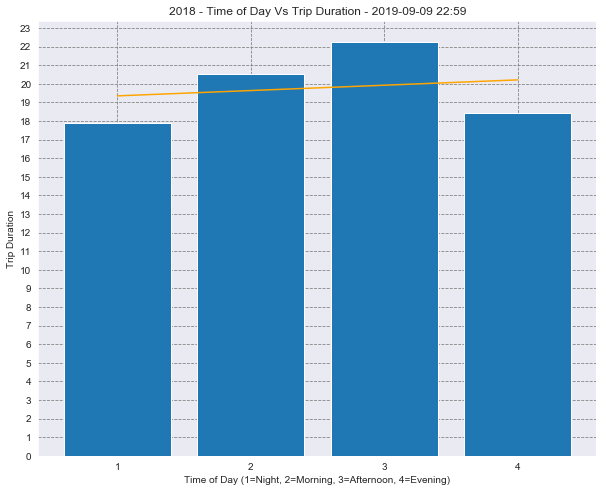

In [186]:
#Bar Chart with regression - Time of Day vs Trip Duration
os.chdir('/Users/macbook/Desktop/Data-Program-Files/Group-Projects/Team-Folder/Data_Graphs/')
now = datetime.datetime.now()
CurDate = now.strftime("%Y-%m-%d %H:%M")

lr = Ridge()
lr.fit(Hourly_TD[['day_bucket']], Hourly_TD['Trip_Duration'])
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
ax.yaxis.grid(color='grey', linestyle='dashed')
ax.xaxis.grid(color='grey', linestyle='dashed')
ax.set_xlabel("Time of Day (1=Night, 2=Morning, 3=Afternoon, 4=Evening)")
ax.set_ylabel("Trip Duration")
ax.set_title("2018 - Time of Day Vs Trip Duration - " + CurDate)

plt.yticks(np.arange(0, 26, step=1))
plt.xticks(np.arange(1, 5, step=1))
plt.bar(Hourly_TD['day_bucket'], Hourly_TD['Trip_Duration'])
plt.plot(Hourly_TD['day_bucket'], lr.coef_*Hourly_TD['day_bucket']+lr.intercept_, color='orange')

HvsTD = plt.gcf()
plt.show()
HvsTD.savefig('RideShare_DayBucketvsTD_2018.jpeg',bbox_inches='tight')


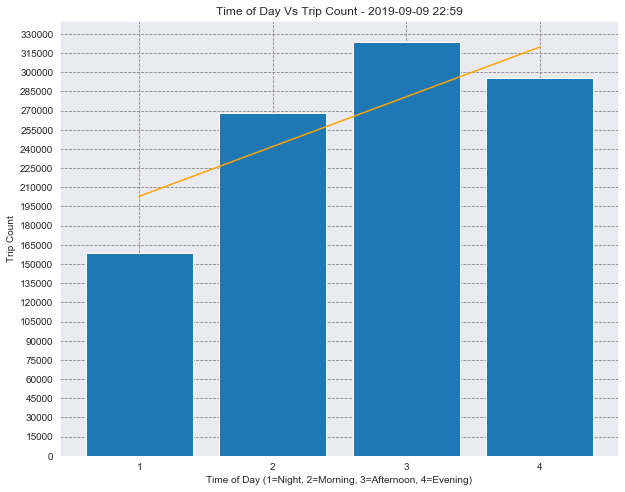

In [187]:
#Bar Chart with regression - Time of Day vs Trip Count
os.chdir('/Users/macbook/Desktop/Data-Program-Files/Group-Projects/Team-Folder/Data_Graphs/')
now = datetime.datetime.now()
CurDate = now.strftime("%Y-%m-%d %H:%M")

lr = Ridge()
lr.fit(Hourly_C[['day_bucket']], Hourly_C['#'])
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
ax.yaxis.grid(color='grey', linestyle='dashed')
ax.xaxis.grid(color='grey', linestyle='dashed')
ax.set_xlabel("Time of Day (1=Night, 2=Morning, 3=Afternoon, 4=Evening)")
ax.set_ylabel("Trip Count")
ax.set_title("Time of Day Vs Trip Count - " + CurDate)

plt.yticks(np.arange(0, 350000, step=15000))
plt.xticks(np.arange(0, 24, step=1))
plt.bar(Hourly_C['day_bucket'], Hourly_C['#'])
plt.plot(Hourly_C['day_bucket'], lr.coef_*Hourly_C['day_bucket']+lr.intercept_, color='orange')

HvsTC = plt.gcf()
plt.show()
HvsTD.savefig('RideShare_DayBucketvsC_2018.jpeg',bbox_inches='tight')


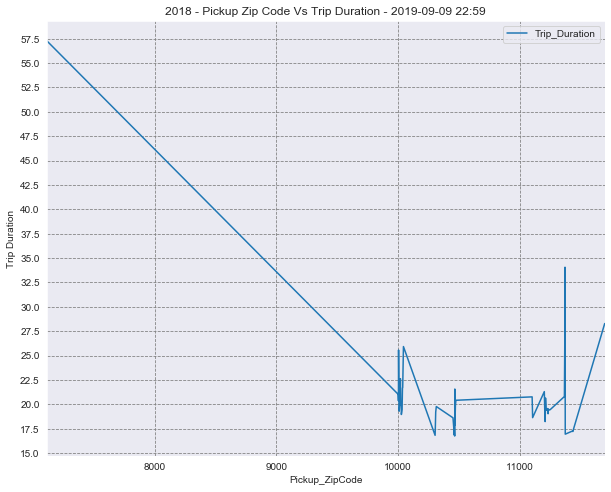

In [189]:
#Zip Code Vs Trip Duration
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
ax.yaxis.grid(color='grey', linestyle='dashed')
ax.xaxis.grid(color='grey', linestyle='dashed')
ax.set_xlim(min(Zip_TD['Pickup_ZipCode'])-100, max(Zip_TD['Pickup_ZipCode'])+100)
plt.yticks(np.arange(0, 60, step=2.5))
ax.set_xlabel("Pickup Zip Code")
ax.set_ylabel("Trip Duration")
ax.set_title("2018 - Pickup Zip Code Vs Trip Duration - " + CurDate)

Zip_TD.plot(kind='line',x='Pickup_ZipCode',y='Trip_Duration',ax=ax)

HvsTC = plt.gcf()
plt.show()
HvsTD.savefig('RideShare_ZipCodevsTD_2018.jpeg',bbox_inches='tight')


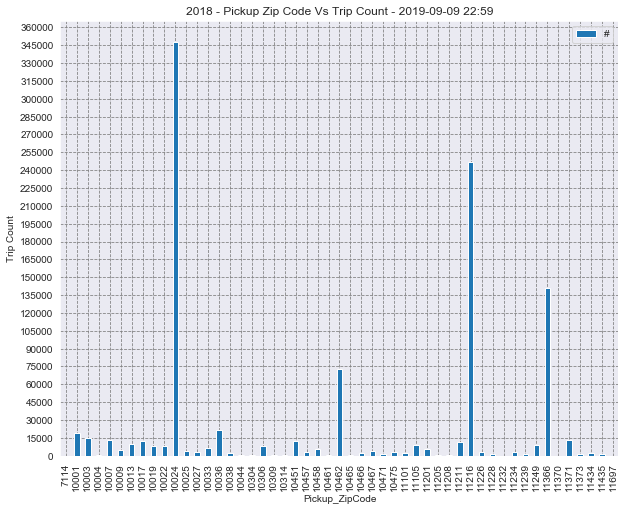

In [190]:
#Zip Code Vs Trip Count
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
ax.yaxis.grid(color='grey', linestyle='dashed')
ax.xaxis.grid(color='grey', linestyle='dashed')
ax.set_xlim(min(Zip_C['Pickup_ZipCode'])-100, max(Zip_C['Pickup_ZipCode'])+100)
plt.yticks(np.arange(0,375000, step=15000))
ax.set_xlabel("Pickup Zip Code")
ax.set_ylabel("Trip Count")
ax.set_title("2018 - Pickup Zip Code Vs Trip Count - " + CurDate)

Zip_C.plot(kind='bar',x='Pickup_ZipCode',y='#',ax=ax)

HvsTC = plt.gcf()
plt.show()
HvsTD.savefig('RideShare_ZipCodevsC_2018.jpeg',bbox_inches='tight')



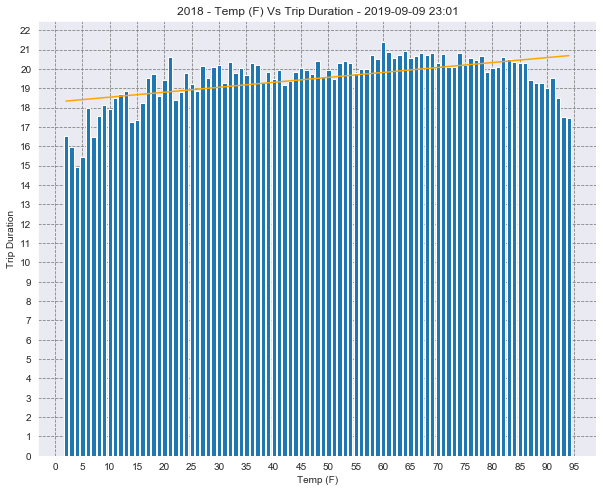

In [191]:
# Temp (F) vs Trip Duration
os.chdir('/Users/macbook/Desktop/Data-Program-Files/Group-Projects/Team-Folder/Data_Graphs/')
now = datetime.datetime.now()
CurDate = now.strftime("%Y-%m-%d %H:%M")

lr = Ridge()
lr.fit(Temp_TD[['Temp']], Temp_TD['Trip_Duration'])
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
ax.yaxis.grid(color='grey', linestyle='dashed')
ax.xaxis.grid(color='grey', linestyle='dashed')
ax.set_xlabel("Temp (F)")
ax.set_ylabel("Trip Duration")
ax.set_title("2018 - Temp (F) Vs Trip Duration - " + CurDate)

plt.yticks(np.arange(0, 26, step=1))
plt.xticks(np.arange(0, 100, step=5))
plt.bar(Temp_TD['Temp'], Temp_TD['Trip_Duration'])
plt.plot(Temp_TD['Temp'], lr.coef_*Temp_TD['Temp']+lr.intercept_, color='orange')

HvsTD = plt.gcf()
plt.show()
HvsTD.savefig('RideShare_TempvsTD_2018.jpeg',bbox_inches='tight')


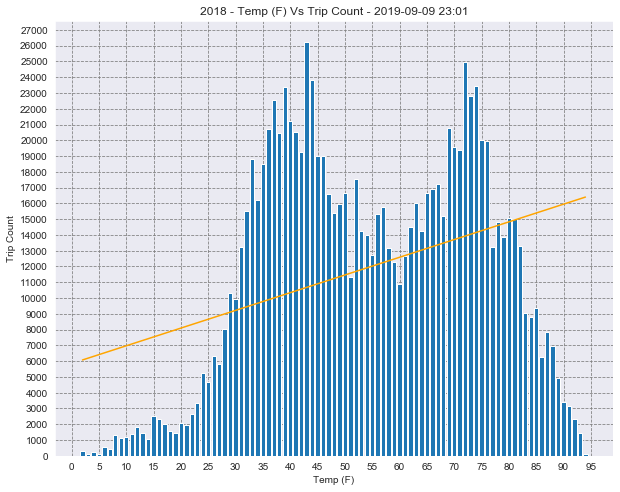

In [193]:
# Temp (F) vs Trip Count
os.chdir('/Users/macbook/Desktop/Data-Program-Files/Group-Projects/Team-Folder/Data_Graphs/')
now = datetime.datetime.now()
CurDate = now.strftime("%Y-%m-%d %H:%M")

lr = Ridge()
lr.fit(Temp_C[['Temp']], Temp_C['#'])
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
ax.yaxis.grid(color='grey', linestyle='dashed')
ax.xaxis.grid(color='grey', linestyle='dashed')
ax.set_xlabel("Temp (F)")
ax.set_ylabel("Trip Count")
ax.set_title("2018 - Temp (F) Vs Trip Count - " + CurDate)

plt.yticks(np.arange(0, 30000, step=1000))
plt.xticks(np.arange(0, 100, step=5))
plt.bar(Temp_C['Temp'], Temp_C['#'])
plt.plot(Temp_C['Temp'], lr.coef_*Temp_C['Temp']+lr.intercept_, color='orange')

HvsTD = plt.gcf()
plt.show()
HvsTD.savefig('RideShare_TempvsC_2018.jpeg',bbox_inches='tight')


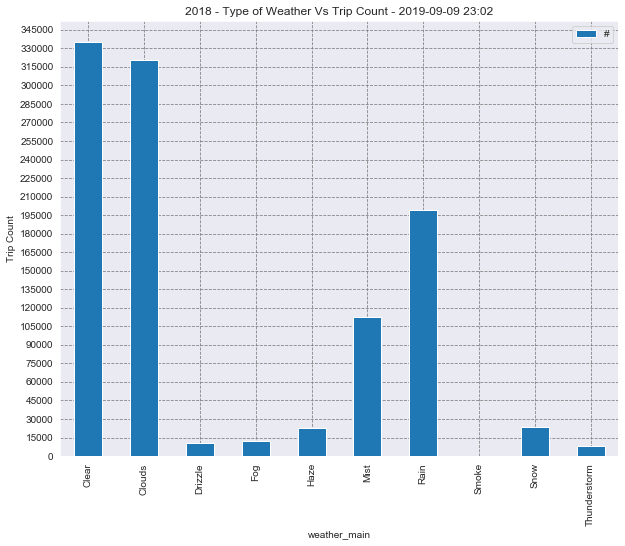

In [194]:
#Weather Type Vs Trip Count
os.chdir('/Users/macbook/Desktop/Data-Program-Files/Group-Projects/Team-Folder/Data_Graphs/')
now = datetime.datetime.now()
CurDate = now.strftime("%Y-%m-%d %H:%M")

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
ax.yaxis.grid(color='grey', linestyle='dashed')
ax.xaxis.grid(color='grey', linestyle='dashed')
#ax.set_xlim(min(Zip_C['Pickup_ZipCode'])-100, max(Zip_C['Pickup_ZipCode'])+100)
plt.yticks(np.arange(0,375000, step=15000))
ax.set_xlabel("Weather Type")
ax.set_ylabel("Trip Count")
ax.set_title("2018 - Type of Weather Vs Trip Count - " + CurDate)

Weather_C.plot(kind='bar',x='weather_main',y='#',ax=ax)

HvsTD = plt.gcf()
plt.show()
HvsTD.savefig('RideShare_WeatherTypevsC_2018.jpeg',bbox_inches='tight')


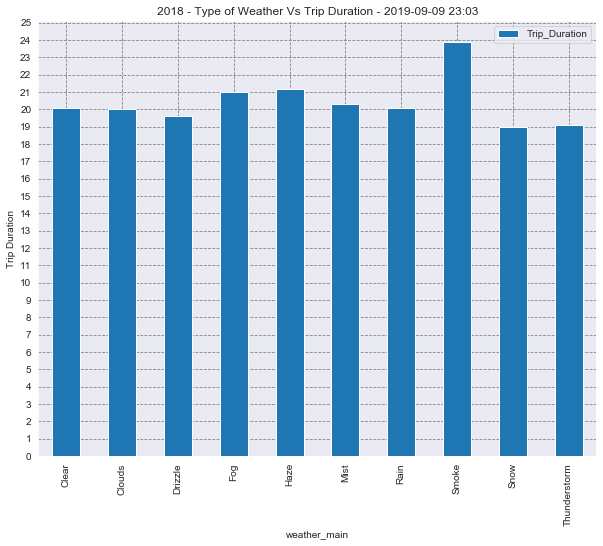

In [195]:
#Weather Type Vs Trip Duration
os.chdir('/Users/macbook/Desktop/Data-Program-Files/Group-Projects/Team-Folder/Data_Graphs/')
now = datetime.datetime.now()
CurDate = now.strftime("%Y-%m-%d %H:%M")

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
ax.yaxis.grid(color='grey', linestyle='dashed')
ax.xaxis.grid(color='grey', linestyle='dashed')
#ax.set_xlim(min(Zip_C['Pickup_ZipCode'])-100, max(Zip_C['Pickup_ZipCode'])+100)
plt.yticks(np.arange(0,30, step=1))
ax.set_xlabel("Weather Type")
ax.set_ylabel("Trip Duration")
ax.set_title("2018 - Type of Weather Vs Trip Duration - " + CurDate)

Weather_TD.plot(kind='bar',x='weather_main',y='Trip_Duration',ax=ax)

HvsTD = plt.gcf()
plt.show()
HvsTD.savefig('RideShare_WeatherTypevsTD_2018.jpeg',bbox_inches='tight')


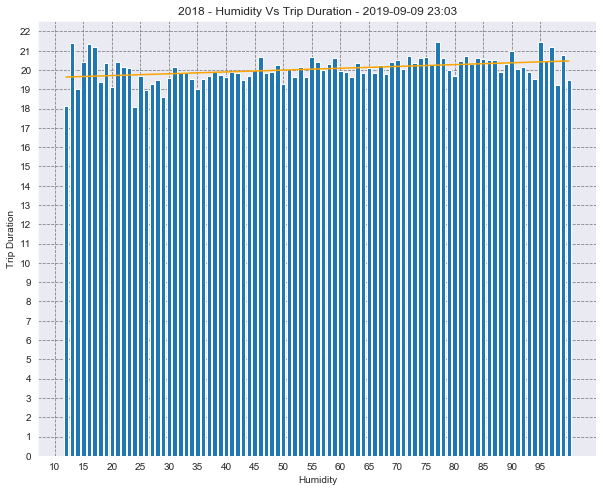

In [196]:
# Humidity vs Trip Duration
os.chdir('/Users/macbook/Desktop/Data-Program-Files/Group-Projects/Team-Folder/Data_Graphs/')
now = datetime.datetime.now()
CurDate = now.strftime("%Y-%m-%d %H:%M")

lr = Ridge()
lr.fit(Humid_TD[['humidity']], Humid_TD['Trip_Duration'])
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
ax.yaxis.grid(color='grey', linestyle='dashed')
ax.xaxis.grid(color='grey', linestyle='dashed')
ax.set_xlabel("Humidity")
ax.set_ylabel("Trip Duration")
ax.set_title("2018 - Humidity Vs Trip Duration - " + CurDate)

plt.yticks(np.arange(0, 26, step=1))
plt.xticks(np.arange(0, 100, step=5))
plt.bar(Humid_TD['humidity'], Humid_TD['Trip_Duration'])
plt.plot(Humid_TD['humidity'], lr.coef_*Humid_TD['humidity']+lr.intercept_, color='orange')

HvsTD = plt.gcf()
plt.show()
HvsTD.savefig('RideShare_HumidvsTD_2018.jpeg',bbox_inches='tight')


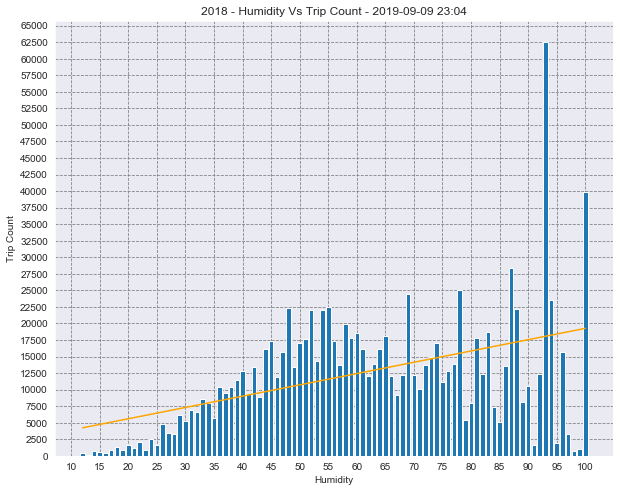

In [199]:
# Humidity vs Trip Count
os.chdir('/Users/macbook/Desktop/Data-Program-Files/Group-Projects/Team-Folder/Data_Graphs/')
now = datetime.datetime.now()
CurDate = now.strftime("%Y-%m-%d %H:%M")

lr = Ridge()
lr.fit(Humid_C[['humidity']], Humid_C['#'])
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
ax.yaxis.grid(color='grey', linestyle='dashed')
ax.xaxis.grid(color='grey', linestyle='dashed')
ax.set_xlabel("Humidity")
ax.set_ylabel("Trip Count")
ax.set_title("2018 - Humidity Vs Trip Count - " + CurDate)

plt.yticks(np.arange(0, 75000, step=2500))
plt.xticks(np.arange(0, 110, step=5))
plt.bar(Humid_C['humidity'], Humid_C['#'])
plt.plot(Humid_C['humidity'], lr.coef_*Humid_C['humidity']+lr.intercept_, color='orange')

HvsTD = plt.gcf()
plt.show()
HvsTD.savefig('RideShare_HumidvsC_2018.jpeg',bbox_inches='tight')


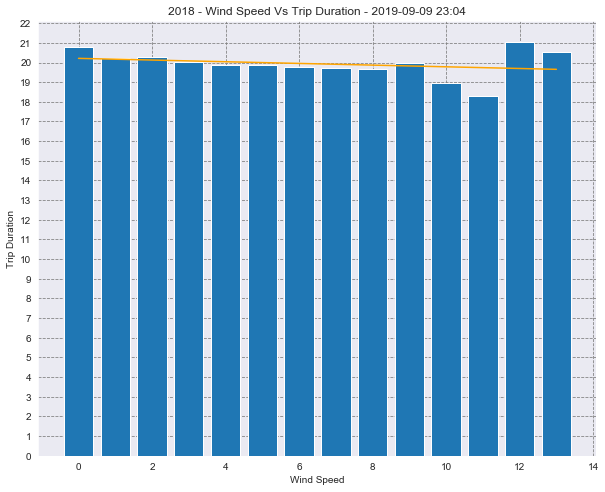

In [200]:
# Wind Speed vs Trip Duration
os.chdir('/Users/macbook/Desktop/Data-Program-Files/Group-Projects/Team-Folder/Data_Graphs/')
now = datetime.datetime.now()
CurDate = now.strftime("%Y-%m-%d %H:%M")

lr = Ridge()
lr.fit(Wind_TD[['wind_speed']], Wind_TD['Trip_Duration'])
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
ax.yaxis.grid(color='grey', linestyle='dashed')
ax.xaxis.grid(color='grey', linestyle='dashed')
ax.set_xlabel("Wind Speed")
ax.set_ylabel("Trip Duration")
ax.set_title("2018 - Wind Speed Vs Trip Duration - " + CurDate)

plt.yticks(np.arange(0, 26, step=1))
plt.xticks(np.arange(0, 16, step=2))
plt.bar(Wind_TD['wind_speed'], Wind_TD['Trip_Duration'])
plt.plot(Wind_TD['wind_speed'], lr.coef_*Wind_TD['wind_speed']+lr.intercept_, color='orange')

HvsTD = plt.gcf()
plt.show()
HvsTD.savefig('RideShare_WindvsTD_2018.jpeg',bbox_inches='tight')


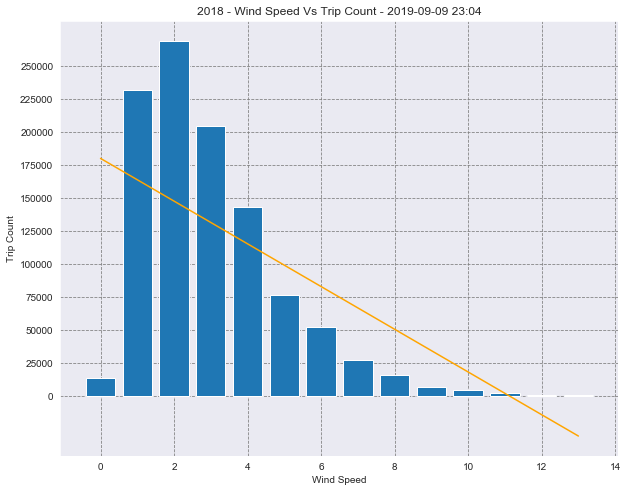

In [201]:
# Wind Speed vs Trip Count
os.chdir('/Users/macbook/Desktop/Data-Program-Files/Group-Projects/Team-Folder/Data_Graphs/')
now = datetime.datetime.now()
CurDate = now.strftime("%Y-%m-%d %H:%M")

lr = Ridge()
lr.fit(Wind_C[['wind_speed']], Wind_C['#'])
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
ax.yaxis.grid(color='grey', linestyle='dashed')
ax.xaxis.grid(color='grey', linestyle='dashed')
ax.set_xlabel("Wind Speed")
ax.set_ylabel("Trip Count")
ax.set_title("2018 - Wind Speed Vs Trip Count - " + CurDate)

plt.yticks(np.arange(0, 275000, step=25000))
plt.xticks(np.arange(0, 16, step=2))
plt.bar(Wind_C['wind_speed'], Wind_C['#'])
plt.plot(Wind_C['wind_speed'], lr.coef_*Wind_C['wind_speed']+lr.intercept_, color='orange')

HvsTD = plt.gcf()
plt.show()
HvsTD.savefig('RideShare_WindvsC_2018.jpeg',bbox_inches='tight')


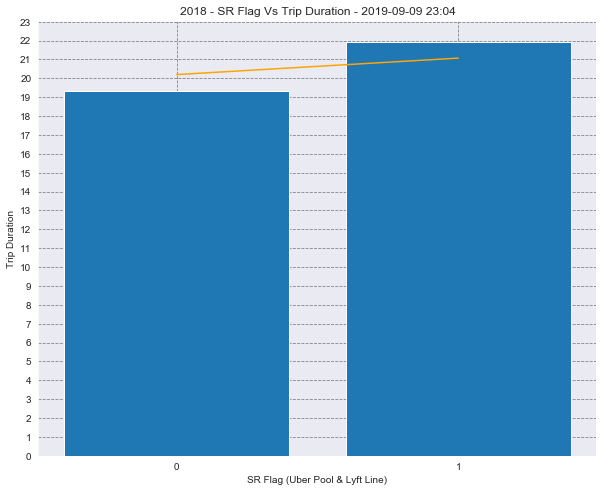

In [202]:
# SR Flag vs Trip Duration
os.chdir('/Users/macbook/Desktop/Data-Program-Files/Group-Projects/Team-Folder/Data_Graphs/')
now = datetime.datetime.now()
CurDate = now.strftime("%Y-%m-%d %H:%M")

lr = Ridge()
lr.fit(SR_TD[['SR_Flag']], SR_TD['Trip_Duration'])
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
ax.yaxis.grid(color='grey', linestyle='dashed')
ax.xaxis.grid(color='grey', linestyle='dashed')
ax.set_xlabel("SR Flag (Uber Pool & Lyft Line)")
ax.set_ylabel("Trip Duration")
ax.set_title("2018 - SR Flag Vs Trip Duration - " + CurDate)

plt.yticks(np.arange(0, 25, step=1))
plt.xticks(np.arange(0, 2, step=1))
plt.bar(SR_TD['SR_Flag'], SR_TD['Trip_Duration'])
plt.plot(SR_TD['SR_Flag'], lr.coef_*SR_TD['SR_Flag']+lr.intercept_, color='orange')

HvsTD = plt.gcf()
plt.show()
HvsTD.savefig('RideShare_SRvsTD_2018.jpeg',bbox_inches='tight')


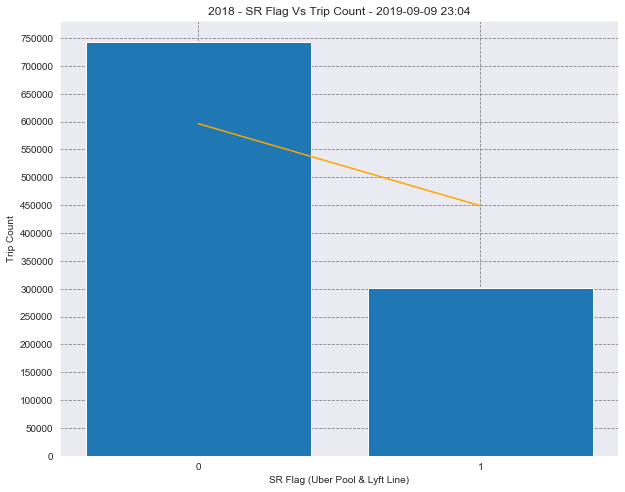

In [203]:
# SR Flag vs Trip Count
os.chdir('/Users/macbook/Desktop/Data-Program-Files/Group-Projects/Team-Folder/Data_Graphs/')
now = datetime.datetime.now()
CurDate = now.strftime("%Y-%m-%d %H:%M")

lr = Ridge()
lr.fit(SR_C[['SR_Flag']], SR_C['#'])
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
ax.yaxis.grid(color='grey', linestyle='dashed')
ax.xaxis.grid(color='grey', linestyle='dashed')
ax.set_xlabel("SR Flag (Uber Pool & Lyft Line)")
ax.set_ylabel("Trip Count")
ax.set_title("2018 - SR Flag Vs Trip Count - " + CurDate)

plt.yticks(np.arange(0, 800000, step=50000))
plt.xticks(np.arange(0, 2, step=1))
plt.bar(SR_C['SR_Flag'], SR_C['#'])
plt.plot(SR_C['SR_Flag'], lr.coef_*SR_C['SR_Flag']+lr.intercept_, color='orange')

HvsTD = plt.gcf()
plt.show()
HvsTD.savefig('RideShare_SRvsC_2018.jpeg',bbox_inches='tight')


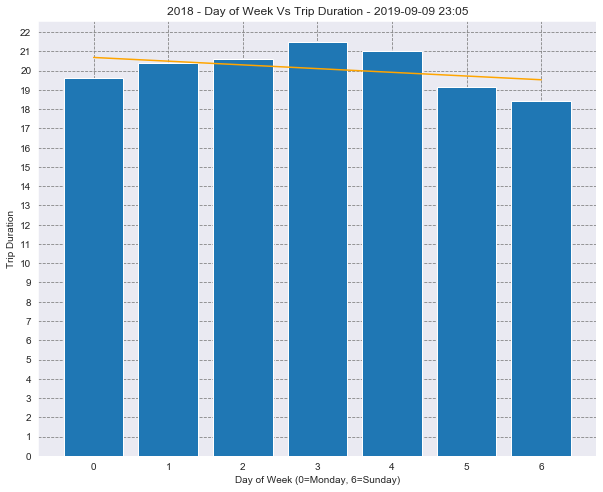

In [204]:
# Day of Week vs Trip Duration
os.chdir('/Users/macbook/Desktop/Data-Program-Files/Group-Projects/Team-Folder/Data_Graphs/')
now = datetime.datetime.now()
CurDate = now.strftime("%Y-%m-%d %H:%M")

lr = Ridge()
lr.fit(DOW_TD[['Day_Of_Week']], DOW_TD['Trip_Duration'])
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
ax.yaxis.grid(color='grey', linestyle='dashed')
ax.xaxis.grid(color='grey', linestyle='dashed')
ax.set_xlabel("Day of Week (0=Monday, 6=Sunday)")
ax.set_ylabel("Trip Duration")
ax.set_title("2018 - Day of Week Vs Trip Duration - " + CurDate)

plt.yticks(np.arange(0, 25, step=1))
plt.xticks(np.arange(0, 7, step=1))
plt.bar(DOW_TD['Day_Of_Week'], DOW_TD['Trip_Duration'])
plt.plot(DOW_TD['Day_Of_Week'], lr.coef_*DOW_TD['Day_Of_Week']+lr.intercept_, color='orange')

HvsTD = plt.gcf()
plt.show()
HvsTD.savefig('RideShare_DoWvsTD_2018.jpeg',bbox_inches='tight')


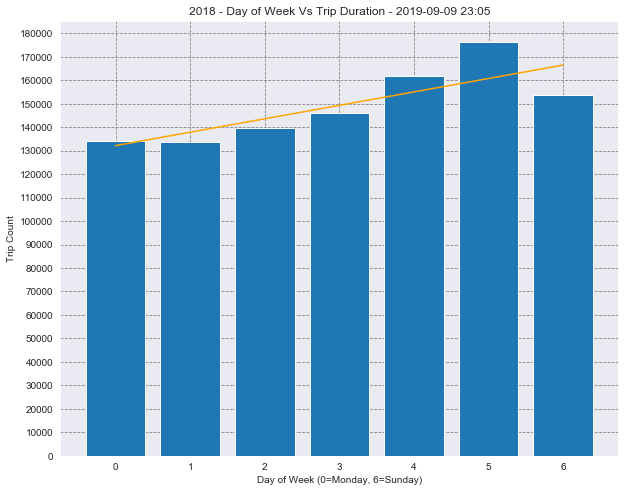

In [205]:
# Day of Week vs Trip Count
os.chdir('/Users/macbook/Desktop/Data-Program-Files/Group-Projects/Team-Folder/Data_Graphs/')
now = datetime.datetime.now()
CurDate = now.strftime("%Y-%m-%d %H:%M")

lr = Ridge()
lr.fit(DOW_C[['Day_Of_Week']], DOW_C['#'])
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
ax.yaxis.grid(color='grey', linestyle='dashed')
ax.xaxis.grid(color='grey', linestyle='dashed')
ax.set_xlabel("Day of Week (0=Monday, 6=Sunday)")
ax.set_ylabel("Trip Count")
ax.set_title("2018 - Day of Week Vs Trip Duration - " + CurDate)

plt.yticks(np.arange(0, 200000, step=10000))
plt.xticks(np.arange(0, 7, step=1))
plt.bar(DOW_C['Day_Of_Week'], DOW_C['#'])
plt.plot(DOW_C['Day_Of_Week'], lr.coef_*DOW_C['Day_Of_Week']+lr.intercept_, color='orange')

HvsTD = plt.gcf()
plt.show()
HvsTD.savefig('RideShare_DoWvsC_2018.jpeg',bbox_inches='tight')


In [206]:
#Bring the 2018 and 2017 data and combine them together
os.chdir('/Users/macbook/Desktop/Data-Program-Files/Group-Projects/Team-Folder/Cleaned_RandomSamples/')

Jan2 = pd.read_csv("RideShare_Data_201701.csv", parse_dates=[0], low_memory=False)
Feb2 = pd.read_csv("RideShare_Data_201702.csv", parse_dates=[0], low_memory=False)
Mar2 = pd.read_csv("RideShare_Data_201703.csv", parse_dates=[0], low_memory=False)
Apr2 = pd.read_csv("RideShare_Data_201704.csv", parse_dates=[0], low_memory=False)
May2 = pd.read_csv("RideShare_Data_201705.csv", parse_dates=[0], low_memory=False)
Jun2 = pd.read_csv("RideShare_Data_201706.csv", parse_dates=[0], low_memory=False)
Jul2 = pd.read_csv("RideShare_Data_201707.csv", parse_dates=[0], low_memory=False)
Aug2 = pd.read_csv("RideShare_Data_201708.csv", parse_dates=[0], low_memory=False)
Sep2 = pd.read_csv("RideShare_Data_201709.csv", parse_dates=[0], low_memory=False)
Oct2 = pd.read_csv("RideShare_Data_201710.csv", parse_dates=[0], low_memory=False)
Nov2 = pd.read_csv("RideShare_Data_201711.csv", parse_dates=[0], low_memory=False)
Dec2 = pd.read_csv("RideShare_Data_201712.csv", parse_dates=[0], low_memory=False)
Yearly17_Data = pd.concat([Jan2, Feb2, Mar2, Apr2, May2, Jun2, Jul2, Aug2, Sep2, Oct2, Nov2, Dec2])

Jan1 = pd.read_csv("RideShare_Data_201801.csv", parse_dates=[0], low_memory=False)
Feb1 = pd.read_csv("RideShare_Data_201802.csv", parse_dates=[0], low_memory=False)
Mar1 = pd.read_csv("RideShare_Data_201803.csv", parse_dates=[0], low_memory=False)
Apr1 = pd.read_csv("RideShare_Data_201804.csv", parse_dates=[0], low_memory=False)
May1 = pd.read_csv("RideShare_Data_201805.csv", parse_dates=[0], low_memory=False)
Jun1 = pd.read_csv("RideShare_Data_201806.csv", parse_dates=[0], low_memory=False)
Jul1 = pd.read_csv("RideShare_Data_201807.csv", parse_dates=[0], low_memory=False)
Aug1 = pd.read_csv("RideShare_Data_201808.csv", parse_dates=[0], low_memory=False)
Sep1 = pd.read_csv("RideShare_Data_201809.csv", parse_dates=[0], low_memory=False)
Oct1 = pd.read_csv("RideShare_Data_201810.csv", parse_dates=[0], low_memory=False)
Nov1 = pd.read_csv("RideShare_Data_201811.csv", parse_dates=[0], low_memory=False)
Dec1 = pd.read_csv("RideShare_Data_201812.csv", parse_dates=[0], low_memory=False)
Yearly18_Data = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec])

Year_Data = pd.concat([Yearly17_Data,Yearly18_Data])

Year_Data.head()


,#,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,Trip_Duration,Temp,humidity,wind_speed,weather_id,weather_main,weather_description
0,0,2017-01-01 00:00:00,1970-01-01 00:00:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-24720480.0,42,44.0,4.0,803.0,Clouds,broken clouds
1,1,2017-01-01 00:00:58,1970-01-01 00:00:00,166.0,0.0,0.0,"Morningside Heights, Manhattan",NaN,10024.0,NaN,-24720481.0,42,44.0,4.0,803.0,Clouds,broken clouds
2,2,2017-01-01 00:02:21,1970-01-01 00:00:00,239.0,0.0,0.0,"Upper West Side South, Manhattan",NaN,10024.0,NaN,-24720482.0,42,44.0,4.0,803.0,Clouds,broken clouds
3,3,2017-01-01 00:03:00,1970-01-01 00:00:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-24720483.0,42,44.0,4.0,803.0,Clouds,broken clouds
4,4,2017-01-01 00:05:46,1970-01-01 00:00:00,36.0,0.0,0.0,"Bushwick North, Brooklyn",NaN,11216.0,NaN,-24720486.0,42,44.0,4.0,803.0,Clouds,broken clouds


In [207]:
#Clean the Data
Year_Data['Pickup_DateTime'] = Year_Data['Pickup_DateTime'].astype('datetime64[ns]') 
Year_Data['Month'] = Year_Data['Pickup_DateTime'].dt.month
Year_Data['Year'] = pd.to_datetime(Year_Data["Pickup_DateTime"]).dt.year
Year_Data['Day_Of_Week'] = Year_Data['Pickup_DateTime'].dt.dayofweek #0 is Monday, 6 is Sunday
Year_Data['Time'] = [d.time() for d in Year_Data['Pickup_DateTime']]
Year_Data[['Hour','Minute','Second']] = Year_Data['Time'].astype(str).str.split(':', expand=True).astype(int)

#1 = Night, 2 = Morning, 3 = Afternoon, 4 = Evening
Year_Data=Year_Data.assign(day_bucket=pd.cut(Year_Data.Pickup_DateTime.dt.hour,
                            [-1,6,12,18,23],
                            labels=[1,2,3,4],
                            include_lowest=True))

Year_Data['day_bucket'] = Year_Data['day_bucket'].astype(int) 

#Hours Group
Year_Data=Year_Data.assign(hours_group=pd.cut(Year_Data.Pickup_DateTime.dt.hour,
                            [-1,6,12,18,23],
                            labels=['Night','Morning','Afternoon','Evening'],
                            include_lowest=True))

Year_Data['day_bucket'] = Year_Data['day_bucket'].astype(int) 

Year_Data.head()


,#,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,...,weather_description,Month,Year,Day_Of_Week,Time,Hour,Minute,Second,day_bucket,hours_group
0,0,2017-01-01 00:00:00,1970-01-01 00:00:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,broken clouds,1,2017,6,00:00:00,0,0,0,1,Night
1,1,2017-01-01 00:00:58,1970-01-01 00:00:00,166.0,0.0,0.0,"Morningside Heights, Manhattan",NaN,10024.0,NaN,...,broken clouds,1,2017,6,00:00:58,0,0,58,1,Night
2,2,2017-01-01 00:02:21,1970-01-01 00:00:00,239.0,0.0,0.0,"Upper West Side South, Manhattan",NaN,10024.0,NaN,...,broken clouds,1,2017,6,00:02:21,0,2,21,1,Night
3,3,2017-01-01 00:03:00,1970-01-01 00:00:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,broken clouds,1,2017,6,00:03:00,0,3,0,1,Night
4,4,2017-01-01 00:05:46,1970-01-01 00:00:00,36.0,0.0,0.0,"Bushwick North, Brooklyn",NaN,11216.0,NaN,...,broken clouds,1,2017,6,00:05:46,0,5,46,1,Night


In [208]:
#Create Array for Month
def fmonthofyear(x):
    return {
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec',
     }.get(x, "NA")

Year_Data["month_name"]= Year_Data["Month"].apply(fmonthofyear)
Year_Data["month_name"].unique()


array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [209]:
#Trip Count Group
month_group = Year_Data.groupby(['Year','Month','hours_group']).size().reset_index(name='count') 
month_group.head()


,Year,Month,hours_group,count
0,2017,1,Night,13248
1,2017,1,Morning,22446
2,2017,1,Afternoon,25988
3,2017,1,Evening,23103
4,2017,2,Night,12747


In [210]:
#Trip Duration Group
month_df = Yearly_Data.groupby(['Month','hours_group'])
month_df = month_df['Trip_Duration'].mean()
month_df = month_df.reset_index()
month_df.head()


,Month,hours_group,Trip_Duration
0,1,Night,17.475877
1,1,Morning,19.666360
2,1,Afternoon,20.610164
3,1,Evening,17.203411
4,2,Night,17.269745


In [211]:
#Create Pivot Table for Trip Count
pv_table = pd.pivot_table(month_group, values='count', index=['Year','Month'],
                    columns=['hours_group'], aggfunc=np.sum)

pv_table.columns

pv_table.columns = pd.Index(list(pv_table.columns))

pv_table = pv_table.reset_index()

pv_table


,Year,Month,Night,Morning,Afternoon,Evening
0,2017,1,13248,22446,25988,23103
1,2017,2,12747,22111,24289,23413
2,2017,3,14715,26540,28505,27792
3,2017,4,15289,24648,26807,25343
4,2017,5,15401,26241,28272,25824
5,2017,6,12844,18552,21952,21261
6,2017,7,13177,18886,22744,22213
7,2017,8,12340,19952,23607,22736
8,2017,9,12872,20099,24816,24240
9,2017,10,14325,22355,26938,25934


In [212]:
pv_table["Year_month"] = pv_table["Year"] + round((pv_table["Month"]/12),2)
pv_table.head()


,Year,Month,Night,Morning,Afternoon,Evening,Year_month
0,2017,1,13248,22446,25988,23103,2017.08
1,2017,2,12747,22111,24289,23413,2017.17
2,2017,3,14715,26540,28505,27792,2017.25
3,2017,4,15289,24648,26807,25343,2017.33
4,2017,5,15401,26241,28272,25824,2017.42


In [213]:
year = pv_table.iloc[:, 0]
yrmonth = pv_table.iloc[:, 6]
yrmonth
pv_table.iloc[:, 4]
yrmonth
pv_table.head()


,Year,Month,Night,Morning,Afternoon,Evening,Year_month
0,2017,1,13248,22446,25988,23103,2017.08
1,2017,2,12747,22111,24289,23413,2017.17
2,2017,3,14715,26540,28505,27792,2017.25
3,2017,4,15289,24648,26807,25343,2017.33
4,2017,5,15401,26241,28272,25824,2017.42


In [214]:
# Grab night rates
night_rate = pv_table.iloc[:, 2]
nt_slope, nt_int, nt_r, nt_p, nt_std_err = stats.linregress(
    yrmonth, night_rate)
nt_fit = nt_slope * yrmonth + nt_int
nt_p


0.9386159871406141

In [215]:
# Grab morning rates
morning_rate = pv_table.iloc[:, 3]
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(
    yrmonth, morning_rate)
m_fit = m_slope * yrmonth + m_int
m_p


0.7218399368436297

In [216]:
# Grab afternoon rates
afternoon_rate = pv_table.iloc[:, 4]
a_slope, a_int, a_r, a_p, a_std_err = stats.linregress(
    yrmonth, afternoon_rate)
a_fit = a_slope * yrmonth + a_int
a_p


0.029491858669133758

In [217]:
# Grab evening rates
evening_rate = pv_table.iloc[:, 5]
e_slope, e_int, e_r, e_p, e_std_err = stats.linregress(
    yrmonth, evening_rate)
e_fit = e_slope * yrmonth + e_int
e_p


0.21168116490358468

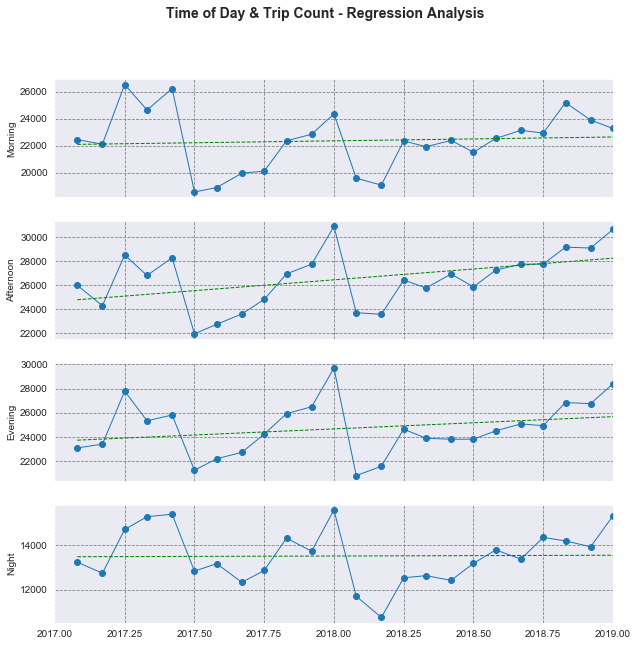

In [218]:
# Hour Rates Regression
sns.set_style("darkgrid")
fig, (ax1,ax3,ax4,ax5) = plt.subplots(4, figsize=(10, 10), sharex=True)
fig.suptitle("Time of Day & Trip Count - Regression Analysis", fontsize=14, fontweight="bold")

ax1.set_xlim(2017, 2019)
ax1.plot(yrmonth, morning_rate, linewidth=1, marker="o")
ax1.plot(yrmonth, m_fit, "g--", linewidth=1)
ax1.set_ylabel("Morning",fontsize=10)
ax1.yaxis.grid(color='grey', linestyle='dashed')
ax1.xaxis.grid(color='grey', linestyle='dashed')

ax3.plot(yrmonth, afternoon_rate, linewidth=1, marker="o")
ax3.plot(yrmonth, a_fit, "g--", linewidth=1)
ax3.set_ylabel("Afternoon",fontsize=10)
ax3.yaxis.grid(color='grey', linestyle='dashed')
ax3.xaxis.grid(color='grey', linestyle='dashed')

ax4.plot(yrmonth, evening_rate, linewidth=1, marker="o")
ax4.plot(yrmonth, e_fit, "g--", linewidth=1)
ax4.set_ylabel("Evening",fontsize=10)
ax4.yaxis.grid(color='grey', linestyle='dashed')
ax4.xaxis.grid(color='grey', linestyle='dashed')

ax5.plot(yrmonth, night_rate, linewidth=1, marker="o")
ax5.plot(yrmonth, nt_fit, "g--", linewidth=1)
ax5.set_ylabel("Night",fontsize=10)
ax5.yaxis.grid(color='grey', linestyle='dashed')
ax5.xaxis.grid(color='grey', linestyle='dashed')

os.chdir('/Users/macbook/Desktop/Data-Program-Files/Group-Projects/Team-Folder/Data_Graphs/')

HvsTD = plt.gcf()
plt.show()
HvsTD.savefig('RideShare_DayBucketRegression.jpeg',bbox_inches='tight')


In [219]:
# Print Results
year = 2019
print("The morning rate in 2019 will be " +
      str(m_slope * year + m_int) + ".")

print("The afternoon rate in 2019 will be " +
      str(a_slope * year + a_int) + ".")

print("The evening rate in 2019 will be " + str(e_slope * year + e_int) + ".")

print("The night rate in 2019 will be " + str(nt_slope * year + nt_int) + ".")



The morning rate in 2019 will be 22642.19610006595.
The afternoon rate in 2019 will be 28245.17514245631.
The evening rate in 2019 will be 25686.77965309797.
The night rate in 2019 will be 13556.642127130566.


In [220]:
#Begin Analysis for Day of Week compared to Trip Count
src_df = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec])

src_df["week_day"] =pd.to_datetime(src_df["Pickup_DateTime"]).dt.dayofweek

src_df.head()


,#,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,Trip_Duration,Temp,humidity,wind_speed,weather_id,weather_main,weather_description,week_day
0,0,2018-01-01 00:00:02,2018-01-01 00:34:21,148.0,48.0,0.0,"Lower East Side, Manhattan","Clinton East, Manhattan",10024,10024,34.0,11,43.0,4.0,800.0,Clear,sky is clear,0
1,1,2018-01-01 00:04:52,2018-01-01 00:19:04,65.0,61.0,1.0,"Downtown Brooklyn/MetroTech, Brooklyn","Crown Heights North, Brooklyn",11201,11216,14.0,11,43.0,4.0,800.0,Clear,sky is clear,0
2,2,2018-01-01 00:05:05,2018-01-01 00:18:08,114.0,148.0,0.0,"Greenwich Village South, Manhattan","Lower East Side, Manhattan",10024,10024,13.0,11,43.0,4.0,800.0,Clear,sky is clear,0
3,3,2018-01-01 00:05:41,2018-01-01 00:26:39,79.0,189.0,0.0,"East Village, Manhattan","Prospect Heights, Brooklyn",10024,11216,21.0,11,43.0,4.0,800.0,Clear,sky is clear,0
4,4,2018-01-01 00:06:22,2018-01-01 00:26:00,7.0,130.0,0.0,"Astoria, Queens","Jamaica, Queens",11366,11366,20.0,11,43.0,4.0,800.0,Clear,sky is clear,0


In [221]:
src_df["week_day"].unique()

def fdayofweek(x):
    return {
        0:'Monday',
        1:'Tuesday',
        2:'Wednesday',
        3:'Thrusday',
        4:'Friday',
        5:'Saturday',
        6:'Sunday',
     }.get(x, "NA")



src_df["week_day_name"]= src_df["week_day"].apply(fdayofweek)
src_df["week_day_name"].unique()


array(['Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [223]:
#Hours Group
src_df['Pickup_DateTime'] = src_df['Pickup_DateTime'].astype('datetime64[ns]') 

src_df=src_df.assign(hours_group=pd.cut(src_df.Pickup_DateTime.dt.hour,
                            [-1,6,12,18,23],
                            labels=['Night','Morning','Afternoon','Evening'],
                            include_lowest=True))
src_df.head()


,#,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,Trip_Duration,Temp,humidity,wind_speed,weather_id,weather_main,weather_description,week_day,week_day_name,hours_group
0,0,2018-01-01 00:00:02,2018-01-01 00:34:21,148.0,48.0,0.0,"Lower East Side, Manhattan","Clinton East, Manhattan",10024,10024,34.0,11,43.0,4.0,800.0,Clear,sky is clear,0,Monday,Night
1,1,2018-01-01 00:04:52,2018-01-01 00:19:04,65.0,61.0,1.0,"Downtown Brooklyn/MetroTech, Brooklyn","Crown Heights North, Brooklyn",11201,11216,14.0,11,43.0,4.0,800.0,Clear,sky is clear,0,Monday,Night
2,2,2018-01-01 00:05:05,2018-01-01 00:18:08,114.0,148.0,0.0,"Greenwich Village South, Manhattan","Lower East Side, Manhattan",10024,10024,13.0,11,43.0,4.0,800.0,Clear,sky is clear,0,Monday,Night
3,3,2018-01-01 00:05:41,2018-01-01 00:26:39,79.0,189.0,0.0,"East Village, Manhattan","Prospect Heights, Brooklyn",10024,11216,21.0,11,43.0,4.0,800.0,Clear,sky is clear,0,Monday,Night
4,4,2018-01-01 00:06:22,2018-01-01 00:26:00,7.0,130.0,0.0,"Astoria, Queens","Jamaica, Queens",11366,11366,20.0,11,43.0,4.0,800.0,Clear,sky is clear,0,Monday,Night


In [249]:
day_hrs = src_df.groupby(['week_day_name','hours_group'])

day_hrs = day_hrs.count()

day_hrs.columns

day_hrs.columns = pd.Index(list(day_hrs.columns))

day_hrs = day_hrs.reset_index()

day_hrs = day_hrs[['week_day_name','hours_group','#']]

day_hrs.head()


,week_day_name,hours_group,#
0,Friday,Night,21064
1,Friday,Morning,42271
2,Friday,Afternoon,47694
3,Friday,Evening,50729
4,Monday,Night,18305


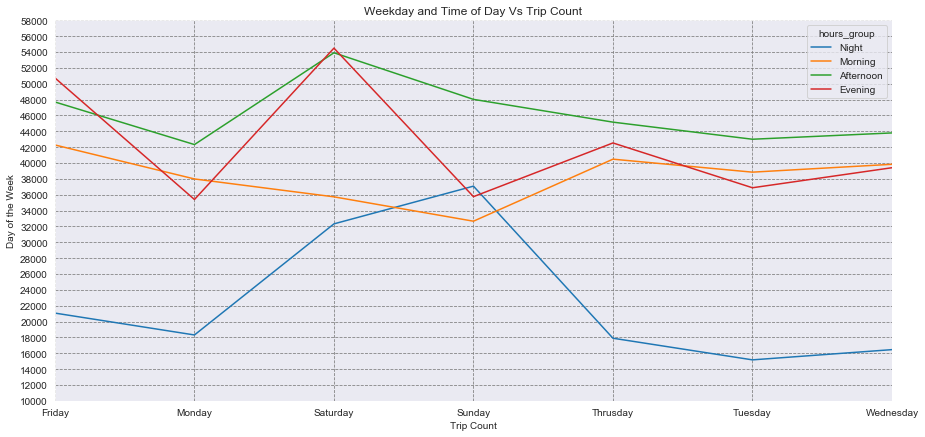

<Figure size 432x288 with 0 Axes>

In [250]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(15,7))
src_df.groupby(['week_day_name','hours_group']).count()['Trip_Duration'].unstack().plot(ax=ax)
ax.yaxis.grid(color='grey', linestyle='dashed')
ax.xaxis.grid(color='grey', linestyle='dashed')
plt.yticks(np.arange(10000, 60000, step=2000))
plt.title("Weekday and Time of Day Vs Trip Count")
plt.ylabel("Day of the Week")
plt.xlabel("Trip Count")
plt.show()

os.chdir('/Users/macbook/Desktop/Data-Program-Files/Group-Projects/Team-Folder/Data_Graphs/')

HvsTD = plt.gcf()
plt.show()
HvsTD.savefig('RideShare_WeekDay_TimeofDay_TripCount_Line.jpeg',bbox_inches='tight')


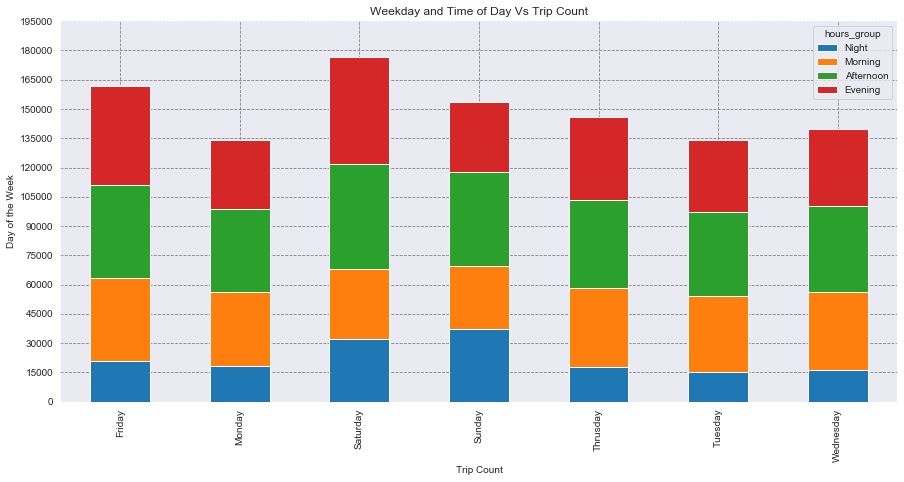

<Figure size 432x288 with 0 Axes>

In [251]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(15,7))
src_df.groupby(['week_day_name','hours_group']).size().unstack().plot(kind='bar',stacked=True,ax=ax)
ax.yaxis.grid(color='grey', linestyle='dashed')
ax.xaxis.grid(color='grey', linestyle='dashed')
plt.yticks(np.arange(0, 205000, step=15000))
plt.title("Weekday and Time of Day Vs Trip Count")
plt.ylabel("Day of the Week")
plt.xlabel("Trip Count")
plt.show()

os.chdir('/Users/macbook/Desktop/Data-Program-Files/Group-Projects/Team-Folder/Data_Graphs/')

HvsTD = plt.gcf()
plt.show()
HvsTD.savefig('RideShare_WeekDay_TimeofDay_TripCount_Bar.jpeg',bbox_inches='tight')
